In [ ]:
!nvidia-smi

#install package's

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.7/780.7 kB 12.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [2]:
import os

#Download dataset

In [3]:
#Download dataset
%cd /content/
!pwd
!pip install gdown
#extract id from url
url='https://drive.google.com/file/d/1vB91Dd4RWAzm9E9KUm80H8cbDufGI9xR/view?usp=drive_link'
# url=input("enter the url : ")
id=url.split('/')[-2]
print("id: ",id)
import gdown

# a file
# output= input("enter the output filename : ")
output= 'data.zip'
gdown.download(id=id, output=output)
dataset_path='/content/dataset/'
zip_file='/content/'+output
os.makedirs(dataset_path,exist_ok=True)
!unzip {zip_file} -d {dataset_path}

/content
/content
id:  1vB91Dd4RWAzm9E9KUm80H8cbDufGI9xR


Downloading...
From: https://drive.google.com/uc?id=1vB91Dd4RWAzm9E9KUm80H8cbDufGI9xR
To: /content/data.zip
100%|██████████| 8.14M/8.14M [00:00<00:00, 48.6MB/s]


Archive:  /content/data.zip
  inflating: /content/dataset/data/data.yaml  
   creating: /content/dataset/data/test/
   creating: /content/dataset/data/test/images/
  inflating: /content/dataset/data/test/images/G57.jpg  
  inflating: /content/dataset/data/test/images/G58.jpg  
  inflating: /content/dataset/data/test/images/G59.jpg  
  inflating: /content/dataset/data/test/images/G60.jpg  
  inflating: /content/dataset/data/test/images/IMG_20211011_153226 (Custom).jpg  
  inflating: /content/dataset/data/test/images/IMG_20211011_153236 (Custom).jpg  
  inflating: /content/dataset/data/test/images/IMG_20211011_153239 (Custom).jpg  
  inflating: /content/dataset/data/test/images/IMG_20211011_153243 (Custom).jpg  
  inflating: /content/dataset/data/test/images/IMG_20211011_153247 (Custom).jpg  
  inflating: /content/dataset/data/test/images/IMG_20211106_140017 (Custom).jpg  
  inflating: /content/dataset/data/test/images/IMG_20211106_140019 (Custom).jpg  
  inflating: /content/dataset/data

In [ ]:
data_location=dataset_path+'data/data.yaml'
print(data_location)
train_location=dataset_path+'data/train'
print(train_location)
valid_location=dataset_path+'data/valid'
print(valid_location)
test_location=dataset_path+'data/test/images'
print(valid_location)

In [5]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

###Overwrite the data.yaml file

In [6]:
%%writetemplate {data_location}


#path: ../datasets/coco128  # dataset root dir
train: {train_location}  # train images (relative to 'path') 128 images
val: {valid_location} # val images (relative to 'path') 128 images
# test:  # test images (optional)

# Classes
nc: 6  # number of classes
names: ['Anthracnose','Bacterial Canker','Gall Midge','Healthy','Powdery Mildew','Scooty Mould']  # class names

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# !unzip /content/drive/MyDrive/data.zip

###Select the model variant

In [7]:
MODEL='yolov8m.pt'

###define output path

In [7]:
model=MODEL.split('.')[0]
print(model)
output_path=f'/content/drive/MyDrive/{model}/output'
os.makedirs(output_path,exist_ok=True)
%cd {output_path}

/content/drive/MyDrive/yolov8m/output/runs/detect/train/weights/best
/content/drive/MyDrive/content/drive/MyDrive/yolov8m/output/runs/detect/train/weights/best/output


In [10]:
%pwd

'/content/drive/MyDrive/yolov8m/output'

#Train the model

In [ ]:
!yolo task=detect mode=train model={MODEL} data={data_location} epochs=20 imgsz=640 plots=True

#Train the 2nd dataset using the custom pre-trained model


In [ ]:
%cd /content/

!pip install gdown
#extract id from url
url='https://drive.google.com/file/d/1-3kr4R3-_NX0cCNf6Y9ow4oKoTwx8NdD/view?usp=drive_link'
# url=input("enter the url : ")
id=url.split('/')[-2]
print("id: ",id)
import gdown

# a file
# output= input("enter the output filename : ")
output= 'data2.zip'
gdown.download(id=id, output=output)
import os
dataset_path='/content/dataset/'
zip_file='/content/'+output
os.makedirs(dataset_path,exist_ok=True)
!unzip {zip_file} -d {dataset_path}

In [ ]:
data_location=dataset_path+'DATA_2/data.yaml'
print(data_location)
train_location=dataset_path+'DATA_2/train'
print(train_location)
valid_location=dataset_path+'DATA_2/valid'
print(valid_location)

In [ ]:
os.path.isfile(data_location)

In [ ]:
%cat {data_location}

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate {data_location}
# Train/val/test sets as
## 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]


#path: ../datasets/coco128  # dataset root dir
train: {train_location}  # train images (relative to 'path') 128 images
val: {valid_location} # val images (relative to 'path') 128 images
# test:  # test images (optional)

# Classes
nc: 6  # number of classes
names: ['Anthracnose','Bacterial Canker','Gall Midge','Healthy','Powdery Mildew','Scooty Mould']  # class names

In [ ]:
# MODEL=input("enter the best.pt file path :")
MODEL='/content/drive/MyDrive/yolov8m/output/runs/detect/train/weights/best.pt'

In [ ]:
%cd {output_path}

/content/drive/MyDrive/yolov8m/output


In [ ]:
!yolo task=detect mode=train model={MODEL} data={data_location} epochs=20 imgsz=640 plots=True

#Test the pre-trained model

In [5]:
MODEL='/content/drive/MyDrive/yolov8m/output/runs/detect/train/weights/best.pt'

In [8]:
%cd {output_path}

/content/drive/MyDrive/content/drive/MyDrive/yolov8m/output/runs/detect/train/weights/best/output


In [9]:
!pwd
!yolo task=detect mode=predict model={MODEL} conf=0.25 source={test_location} save=True

/content/drive/MyDrive/content/drive/MyDrive/yolov8m/output/runs/detect/train/weights/best/output
Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs

image 1/24 /content/dataset/data/test/images/G57.jpg: 512x640 1 Gall Midge, 2259.1ms
image 2/24 /content/dataset/data/test/images/G58.jpg: 640x480 1 Gall Midge, 1657.1ms
image 3/24 /content/dataset/data/test/images/G59.jpg: 640x480 1 Gall Midge, 1219.8ms
image 4/24 /content/dataset/data/test/images/G60.jpg: 640x480 1 Gall Midge, 1347.0ms
image 5/24 /content/dataset/data/test/images/IMG_20211011_153226 (Custom).jpg: 480x640 1 Anthracnose, 1270.2ms
image 6/24 /content/dataset/data/test/images/IMG_20211011_153236 (Custom).jpg: 640x480 1 Anthracnose, 1276.0ms
image 7/24 /content/dataset/data/test/images/IMG_20211011_153239 (Custom).jpg: 640x480 1 Anthracnose, 1295.8ms
image 8/24 /content/dataset/data/test/images/IMG_20211011_15324

#Display the predicted images


In [10]:
# prediction_result_path=output_path+'/runs/detect/predict2'
#copy and paste the prediction folder path
prediction_result_path='/content/drive/MyDrive/yolov8m/output/runs/detect/predict'
# prediction_result_path=input(" enthe the prediction path:")
prediction_result_path

'/content/drive/MyDrive/yolov8m/output/runs/detect/predict'

In [11]:
import glob

img_files=glob.glob(f'{prediction_result_path}/*.jpg')
for file in img_files:
  print(file)

/content/drive/MyDrive/yolov8m/output/runs/detect/predict/G57.jpg
/content/drive/MyDrive/yolov8m/output/runs/detect/predict/G58.jpg
/content/drive/MyDrive/yolov8m/output/runs/detect/predict/G59.jpg
/content/drive/MyDrive/yolov8m/output/runs/detect/predict/G60.jpg
/content/drive/MyDrive/yolov8m/output/runs/detect/predict/IMG_20211011_153226 (Custom).jpg
/content/drive/MyDrive/yolov8m/output/runs/detect/predict/IMG_20211011_153236 (Custom).jpg
/content/drive/MyDrive/yolov8m/output/runs/detect/predict/IMG_20211011_153239 (Custom).jpg
/content/drive/MyDrive/yolov8m/output/runs/detect/predict/IMG_20211011_153243 (Custom).jpg
/content/drive/MyDrive/yolov8m/output/runs/detect/predict/IMG_20211011_153247 (Custom).jpg
/content/drive/MyDrive/yolov8m/output/runs/detect/predict/IMG_20211106_140017 (Custom).jpg
/content/drive/MyDrive/yolov8m/output/runs/detect/predict/IMG_20211106_140019 (Custom).jpg
/content/drive/MyDrive/yolov8m/output/runs/detect/predict/IMG_20211106_140023 (Custom).jpg
/content

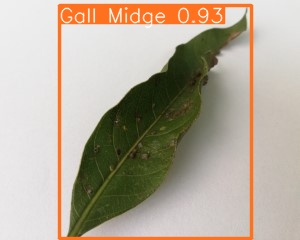

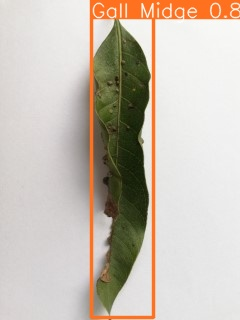

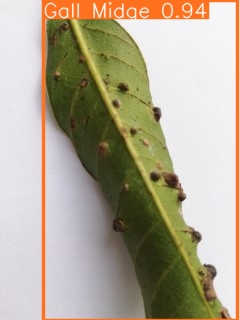

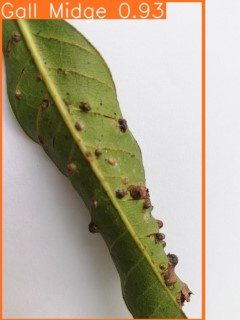

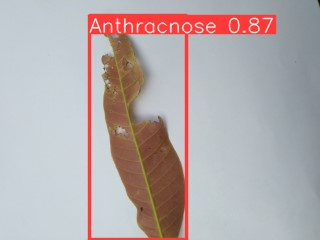

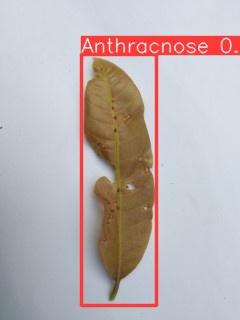

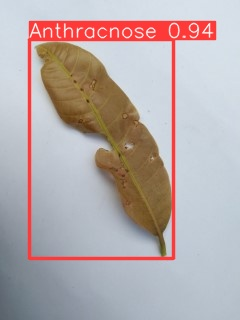

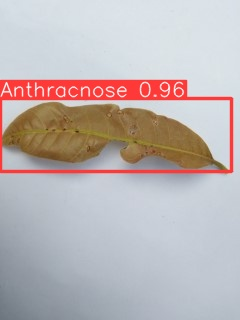

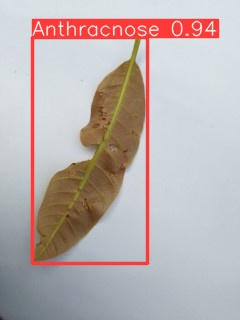

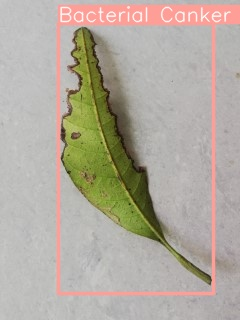

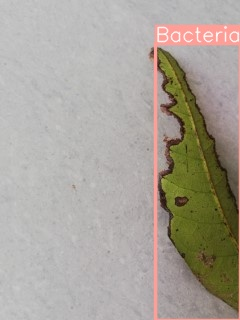

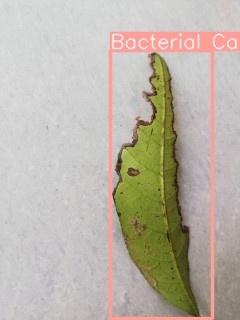

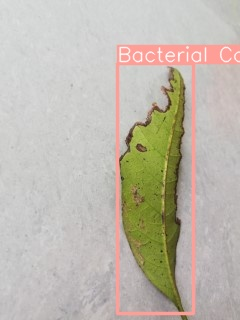

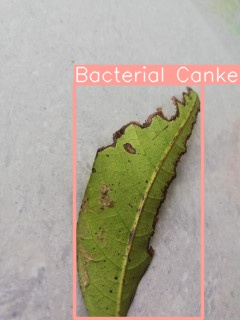

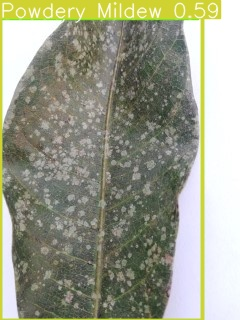

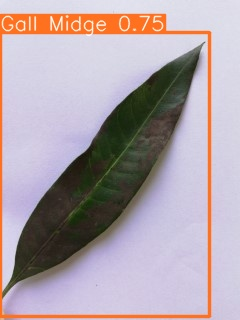

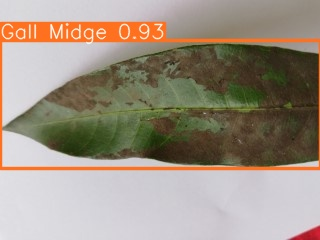

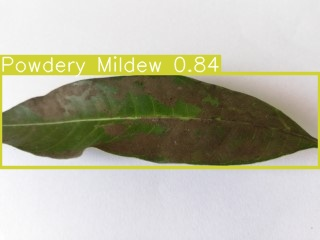

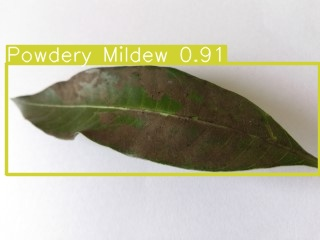

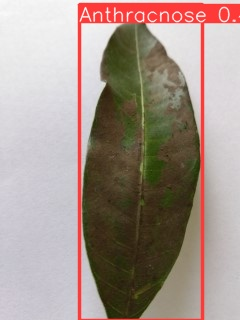

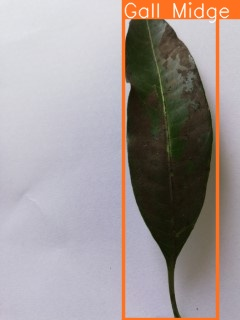

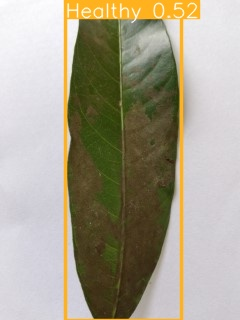

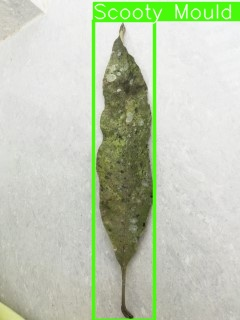

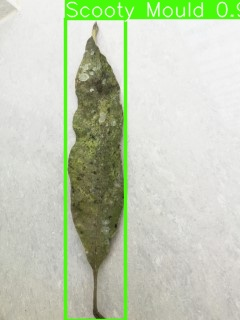

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{prediction_result_path}/*.jpg'):
      display(Image(filename=image_path, width=600,height=600))
      print("\n")

In [21]:
import glob
from IPython.display import Image, display

# for image_path in glob.glob(f'{prediction_result_path}/*.jpg'):
#       display(Image(filename=image_path, width=600,height=600))
#       print("\n")

for image_path in glob.glob(f'/content/drive/MyDrive/yolov8m/output/runs/detect/train/*.jpg'):
      display(Image(filename=image_path, width=600,height=600))
      print("\n")



Output hidden; open in https://colab.research.google.com to view.

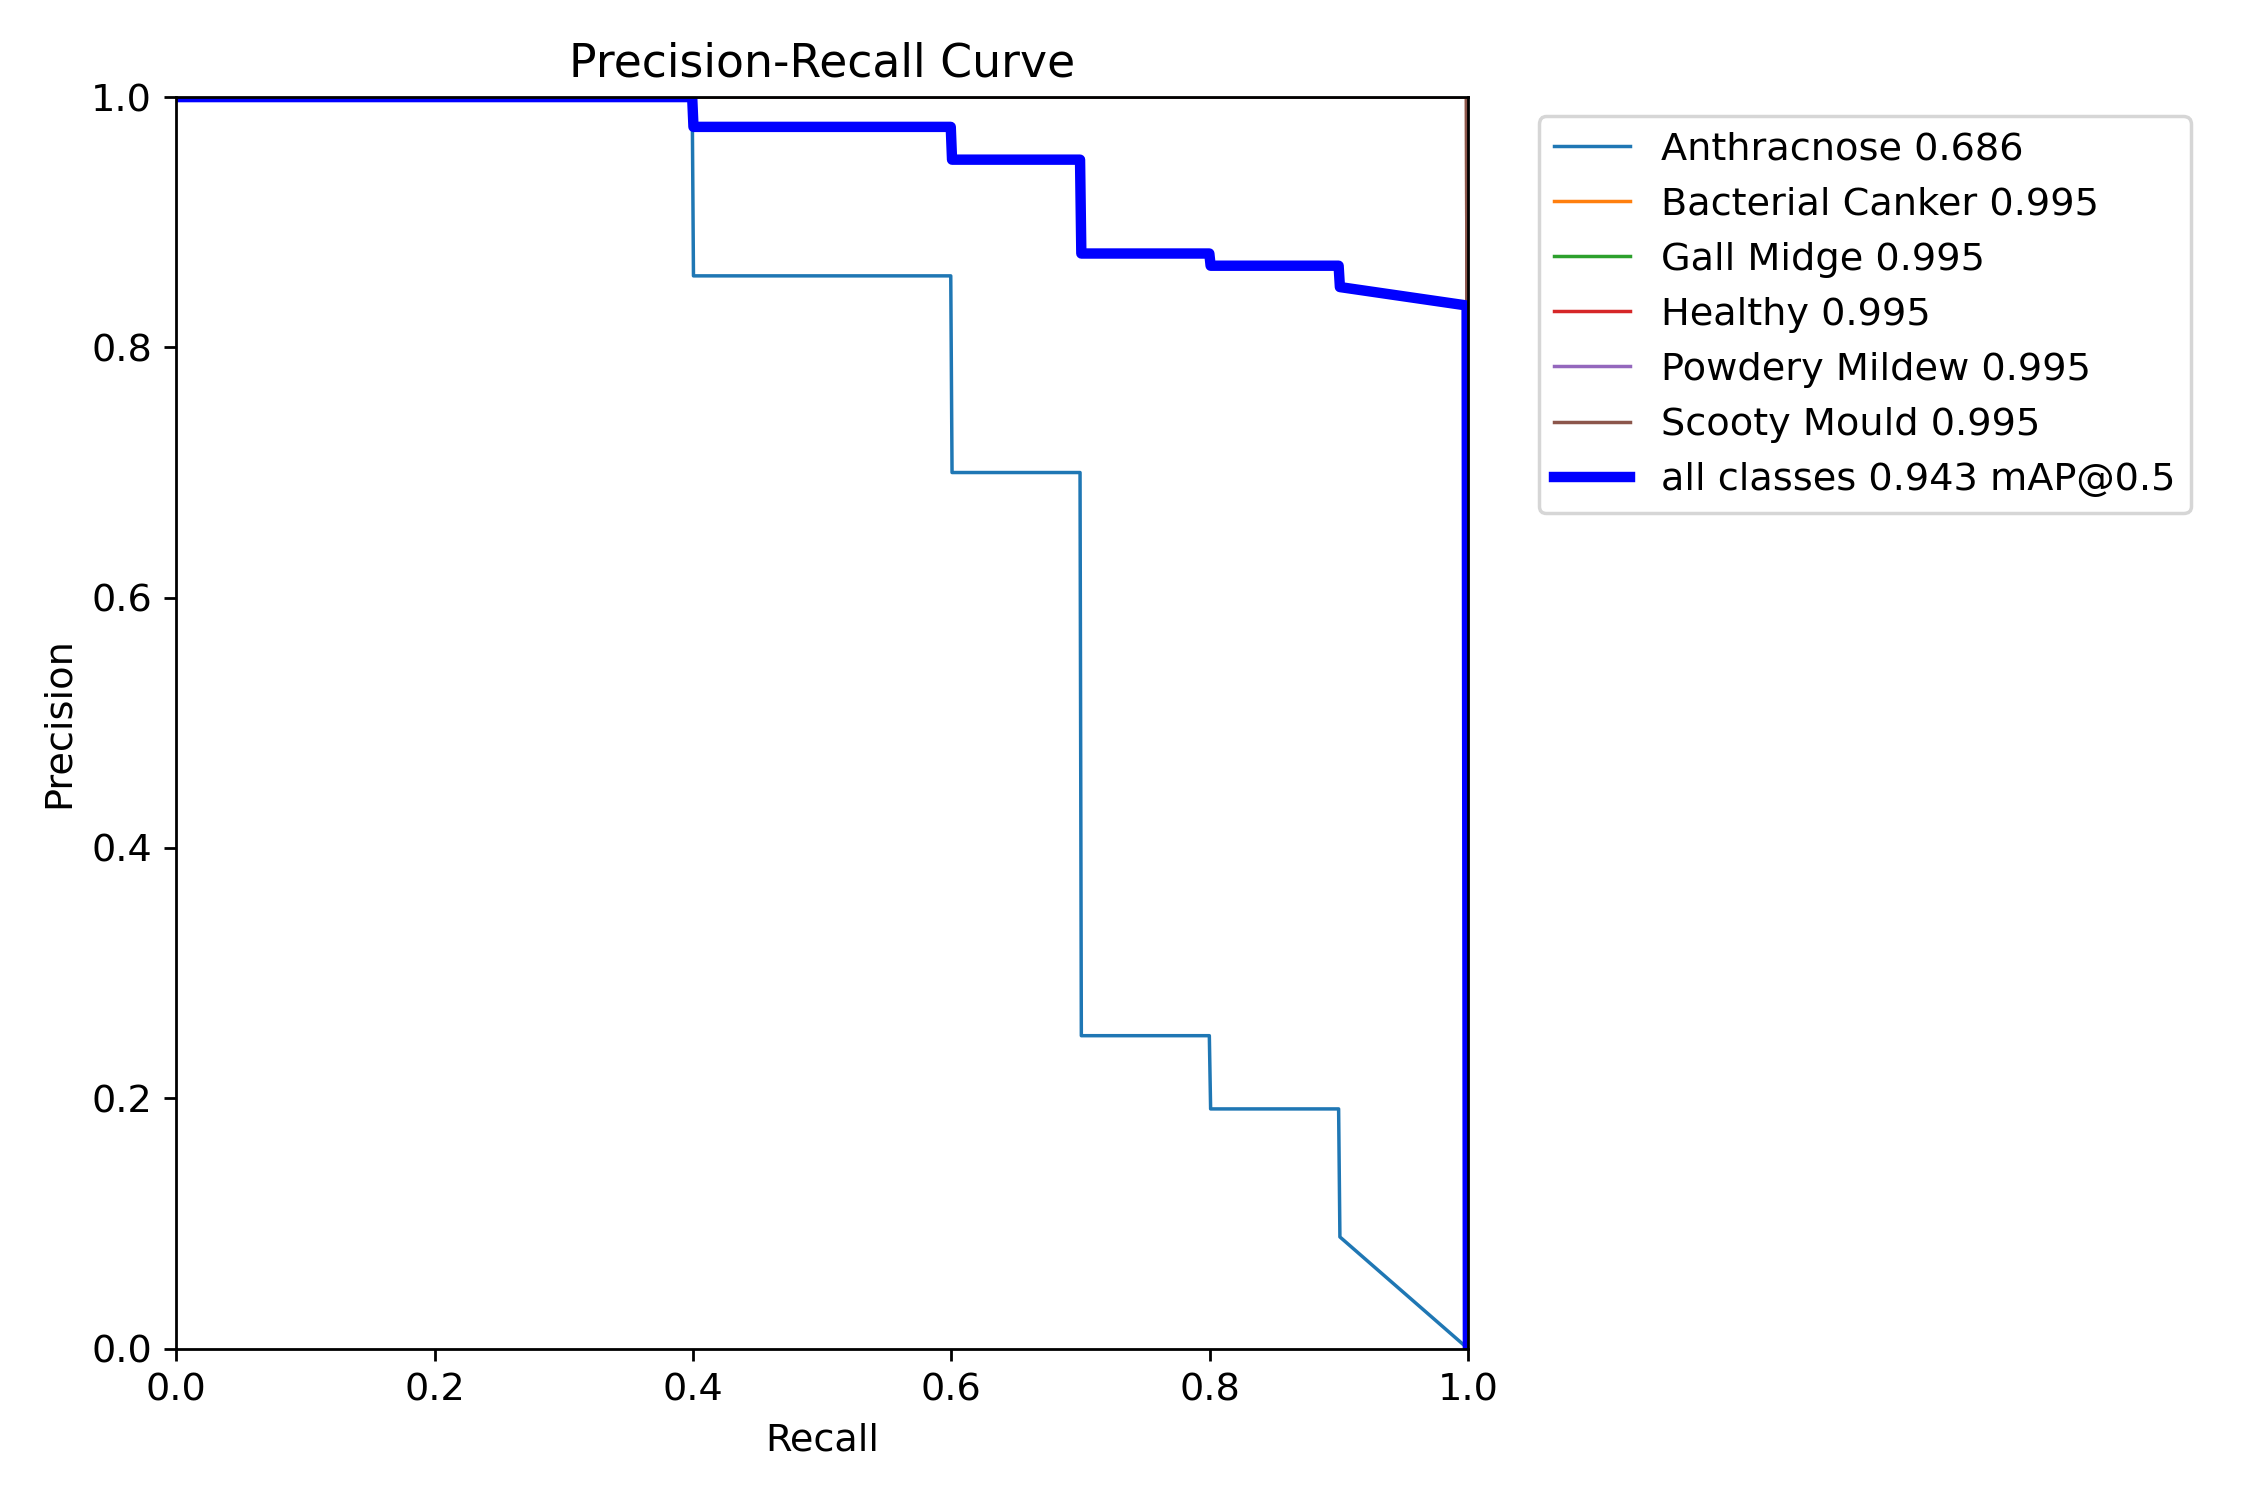

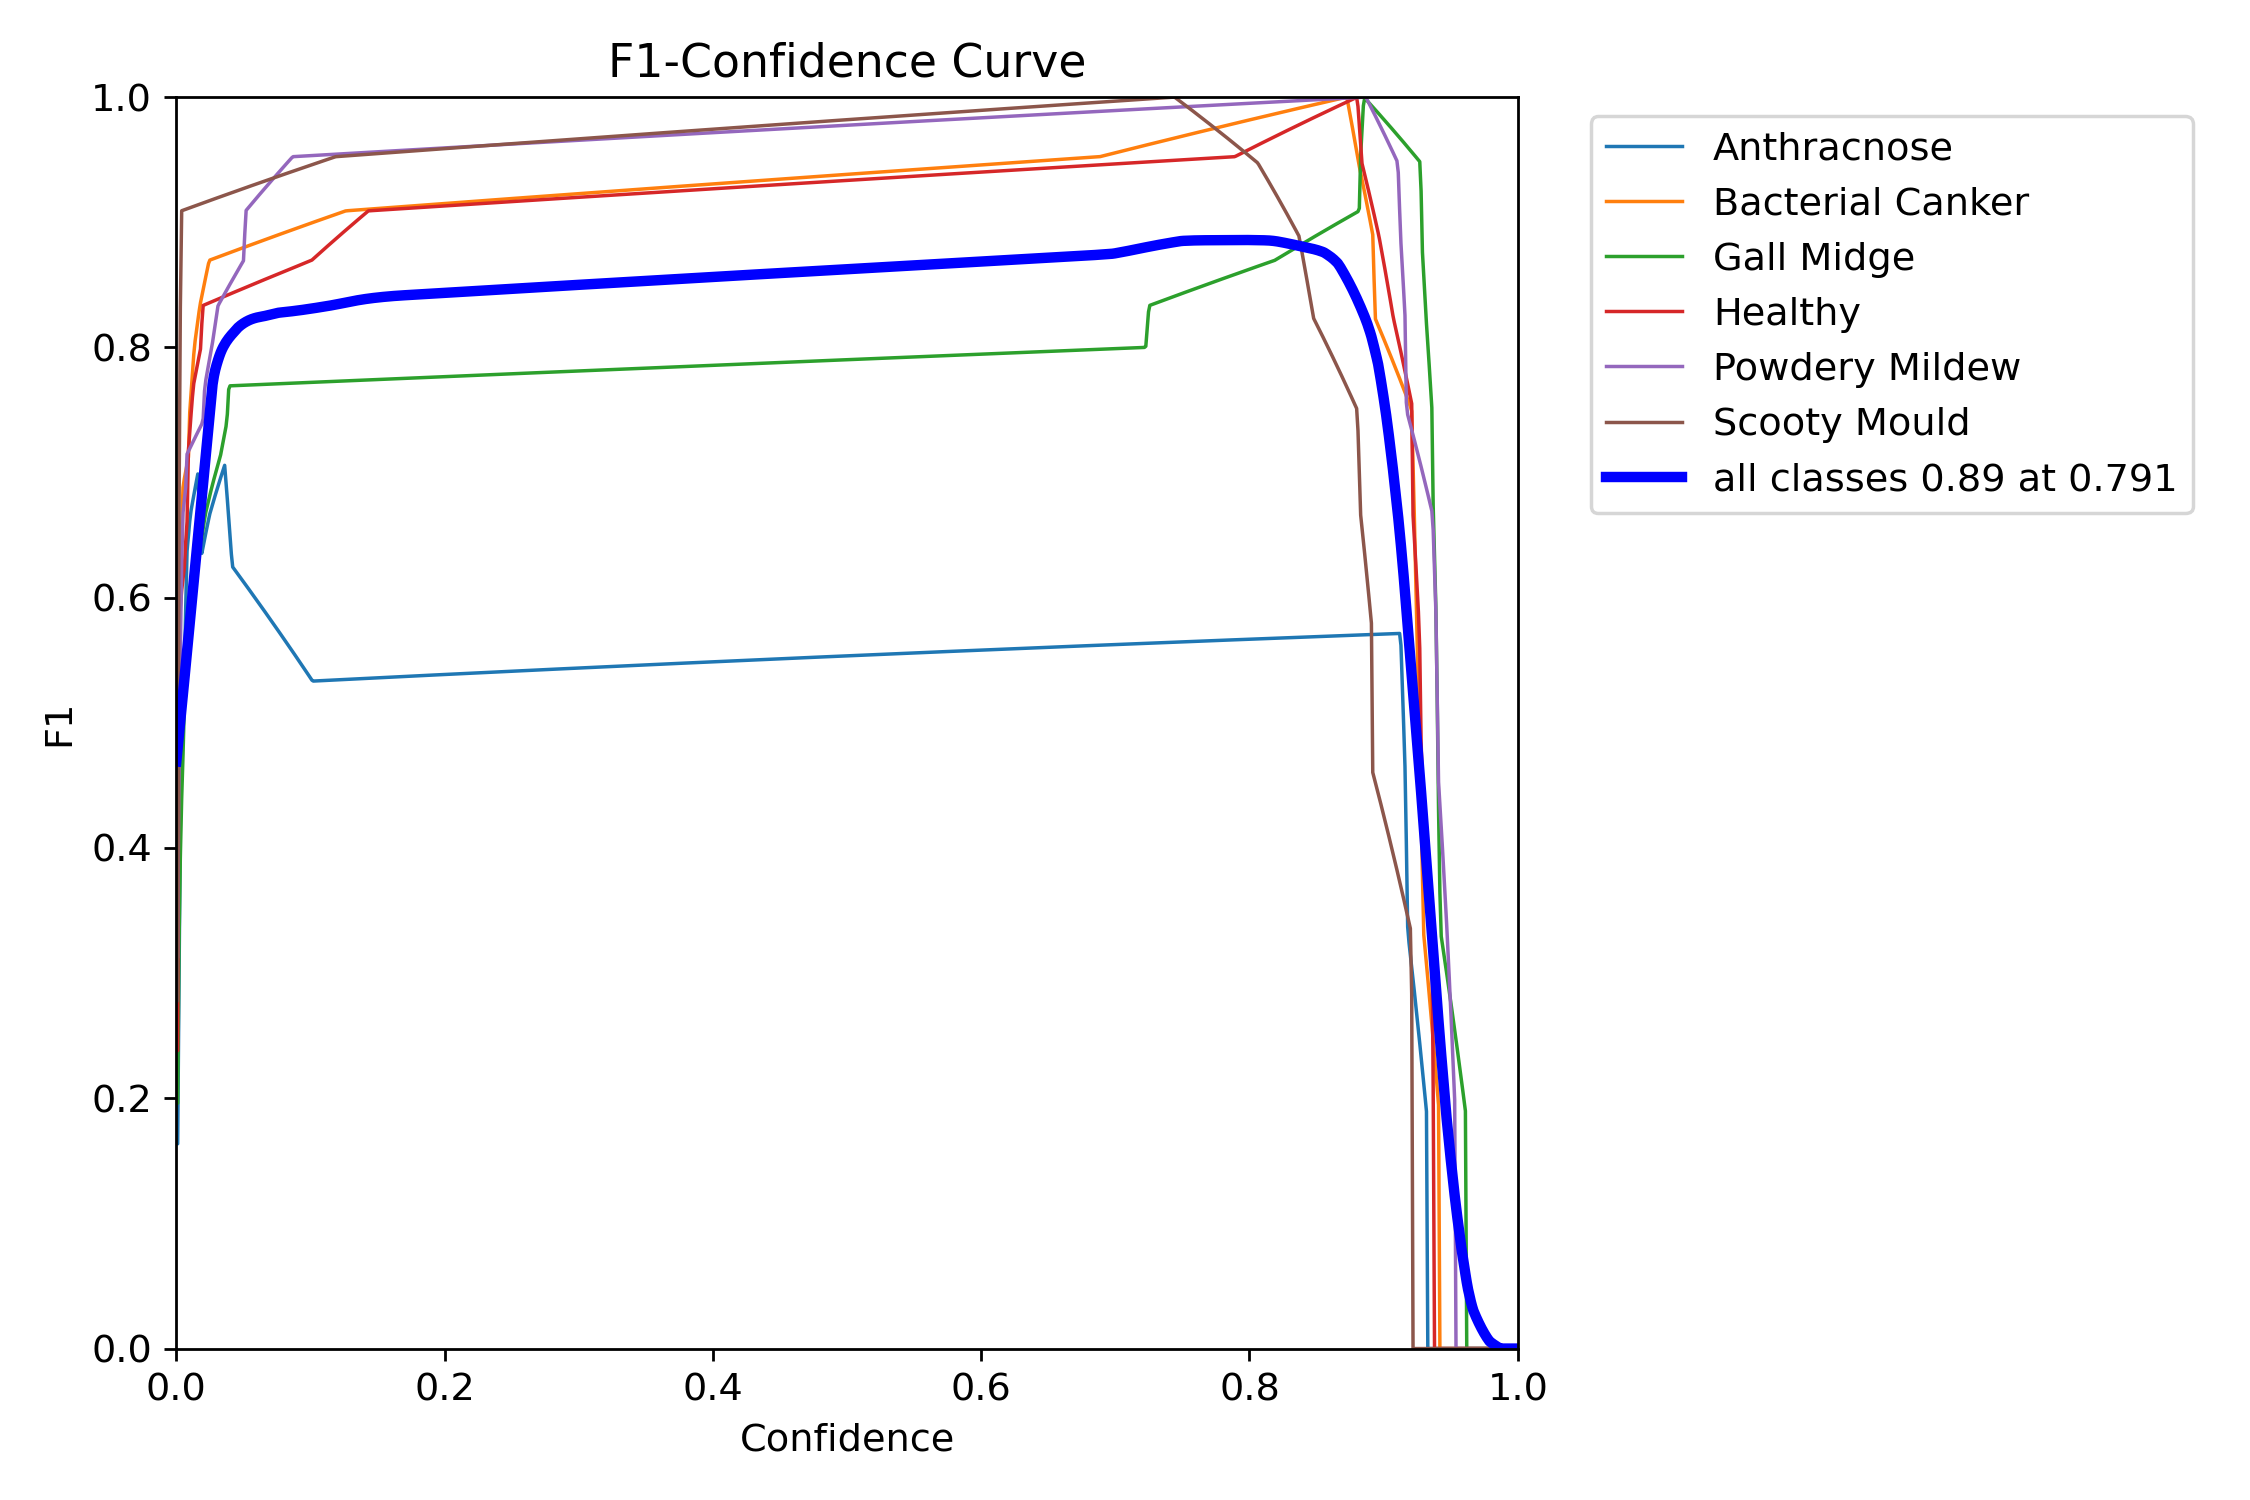

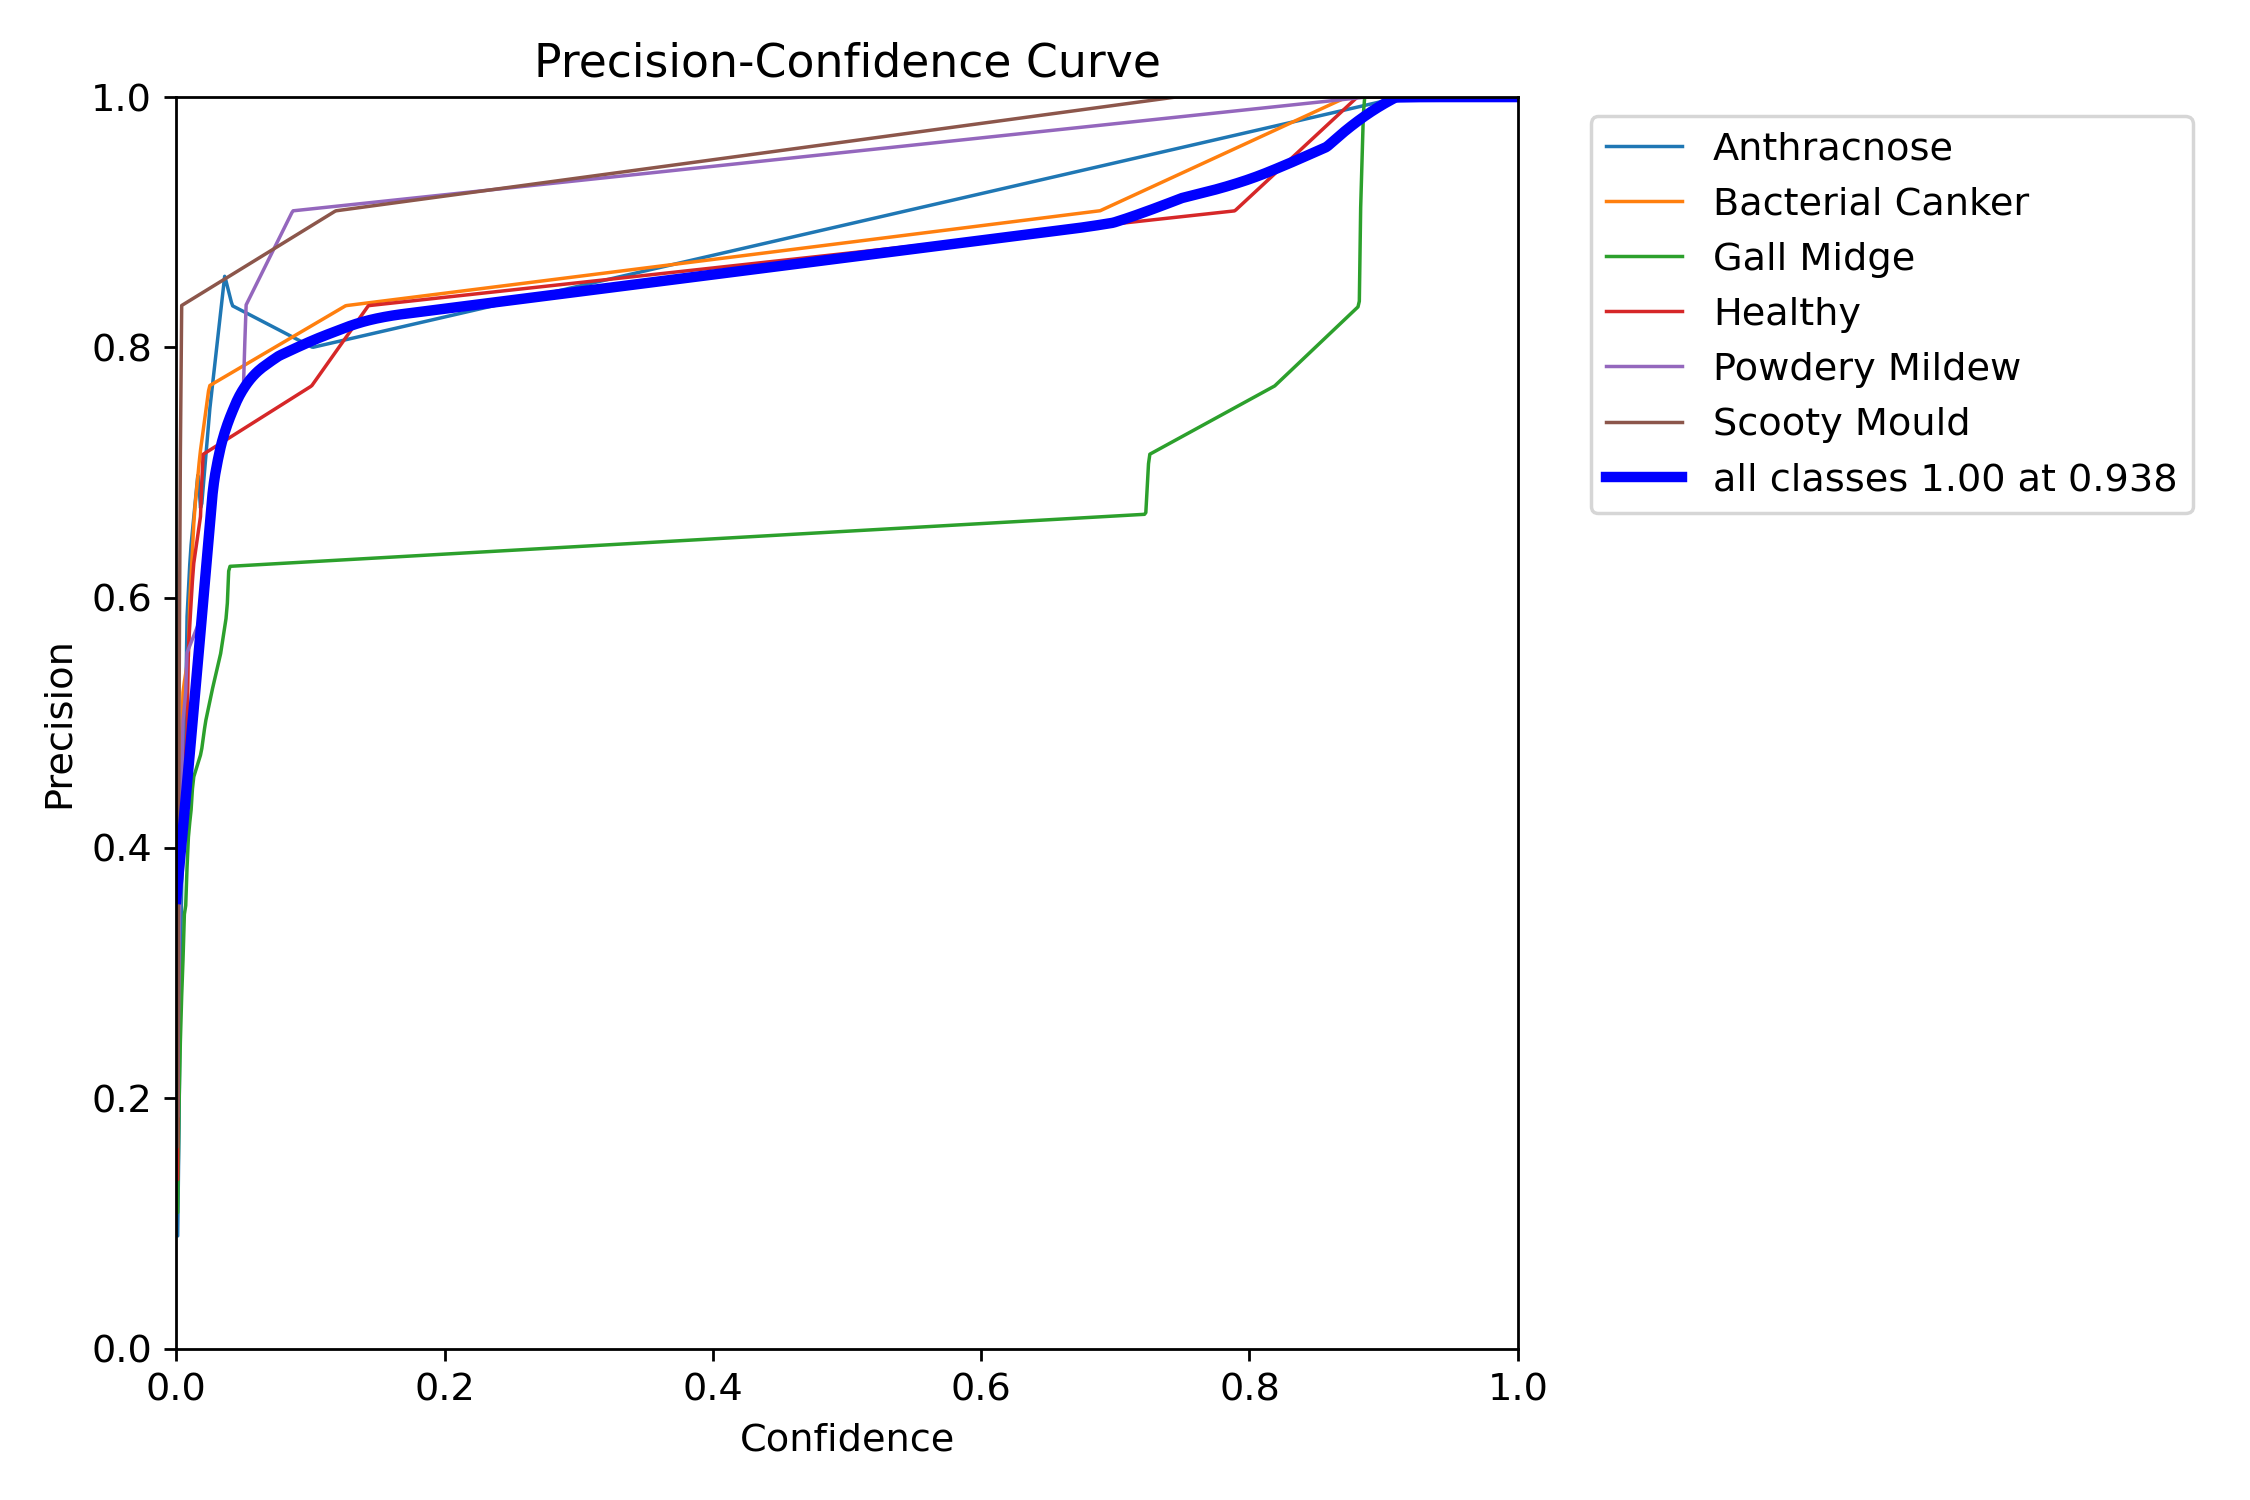

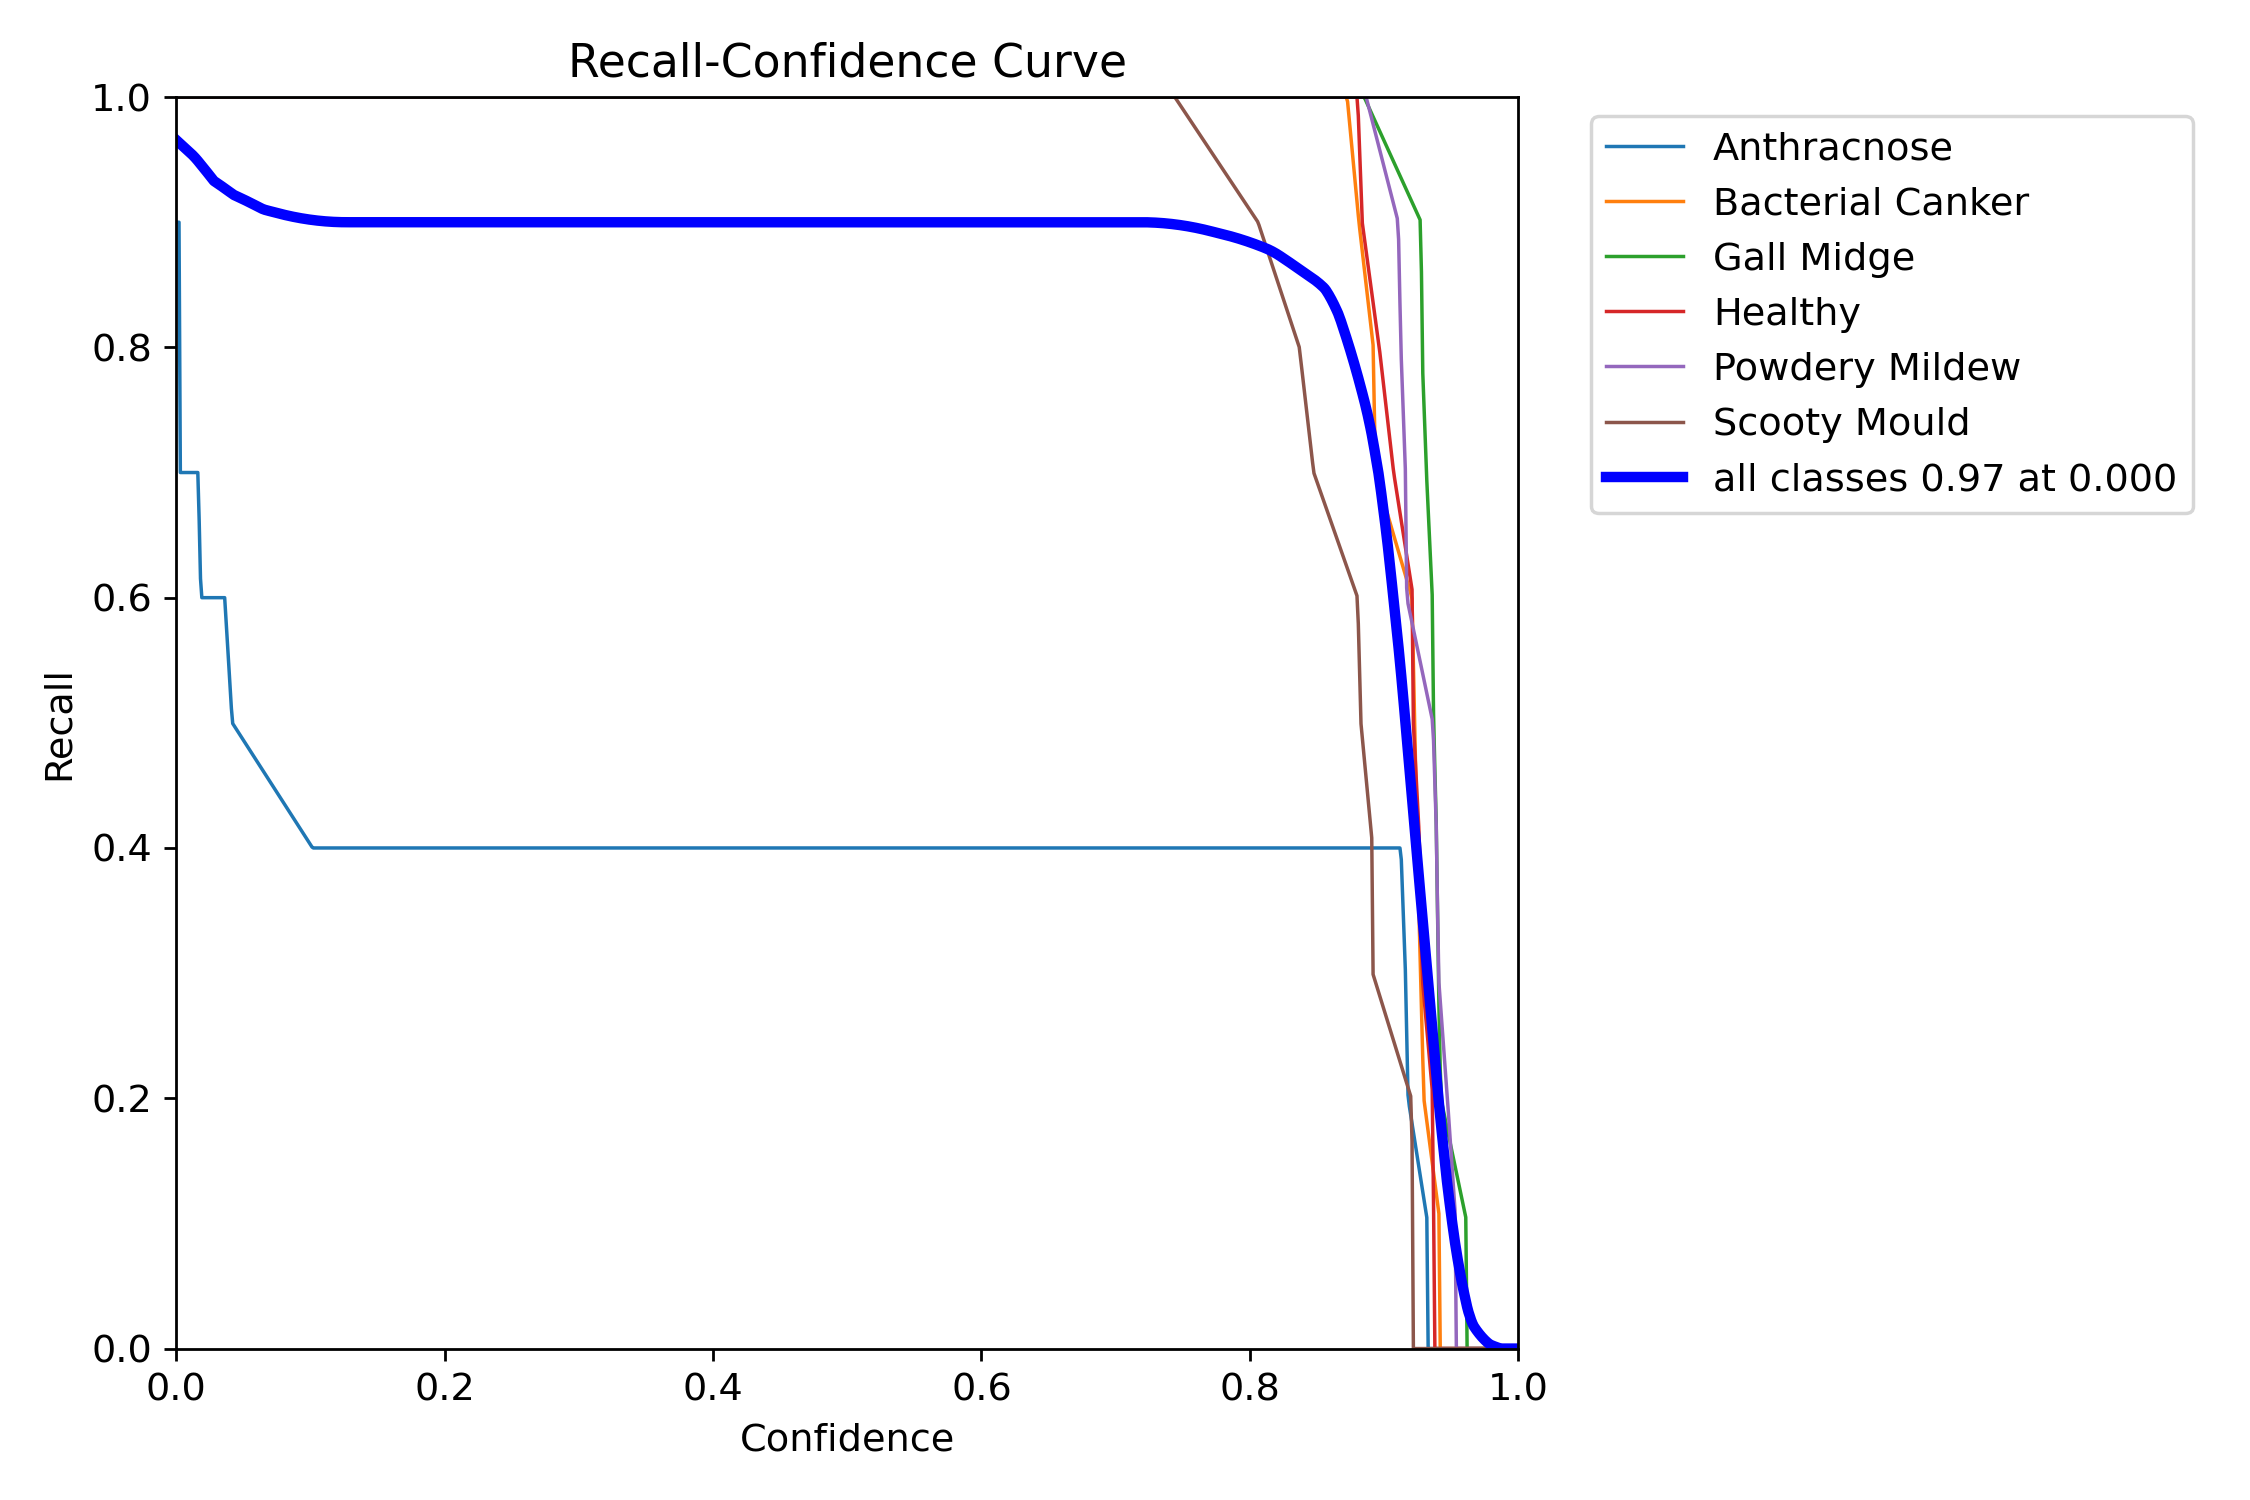

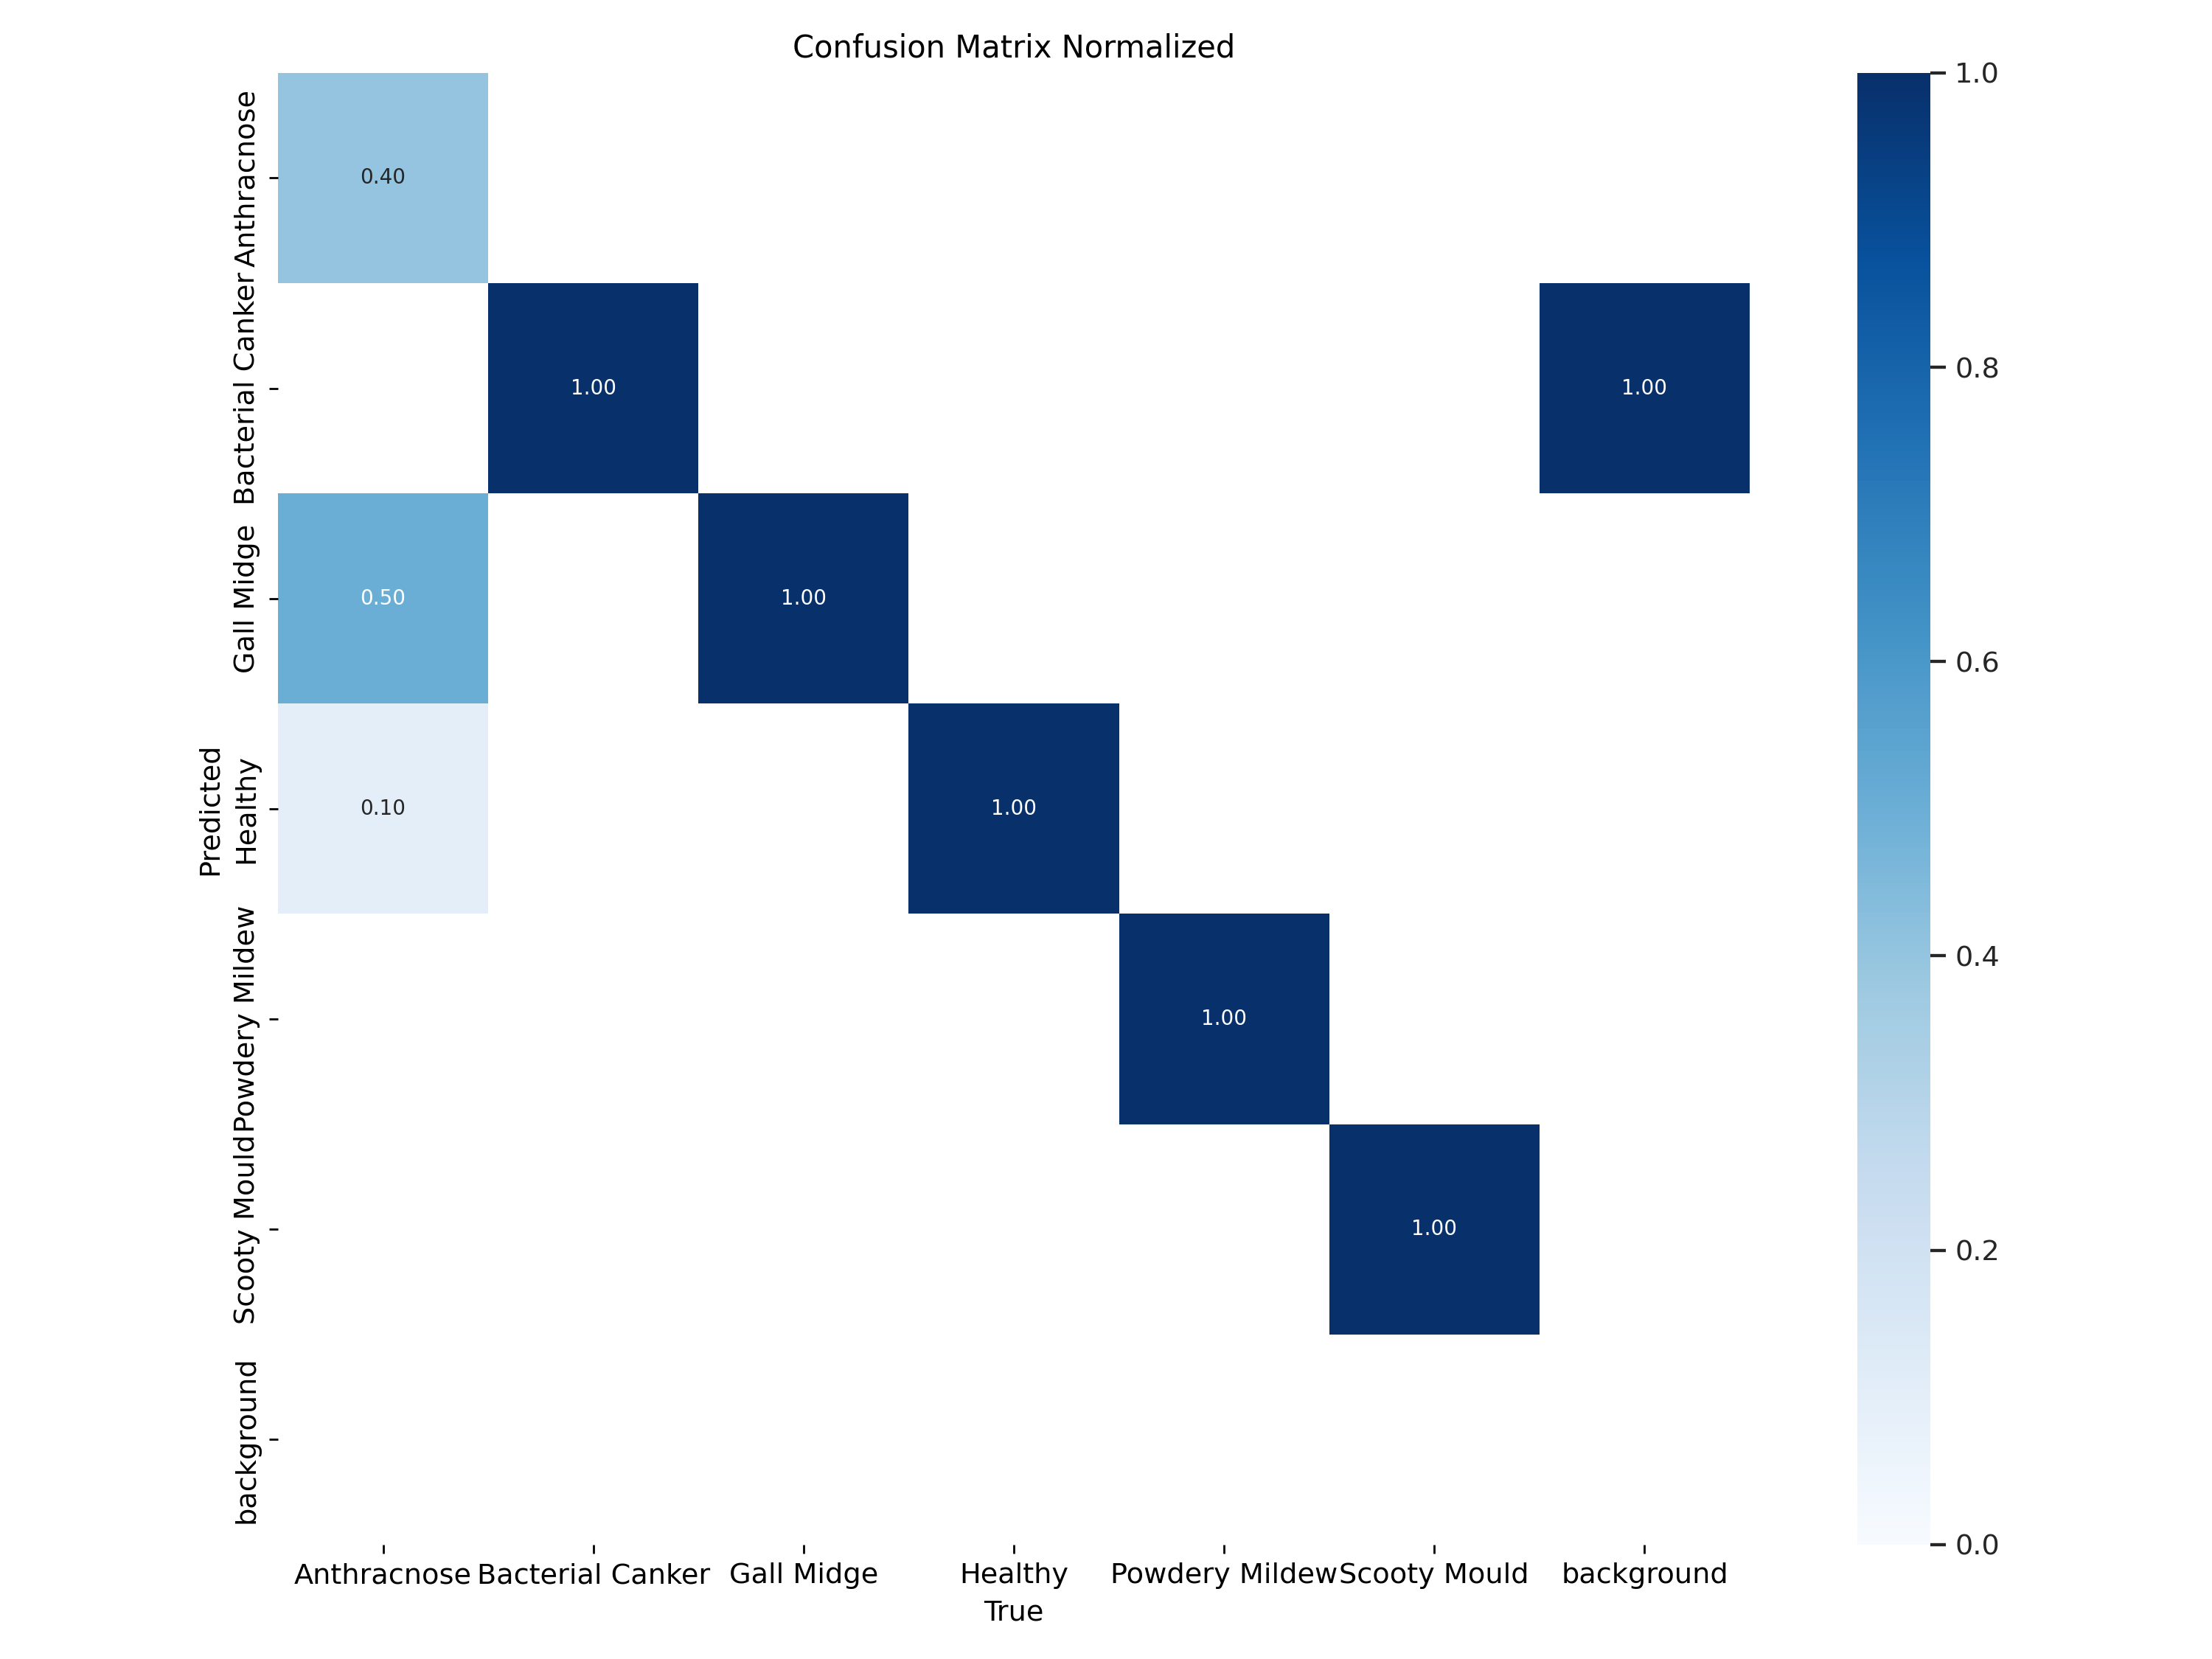

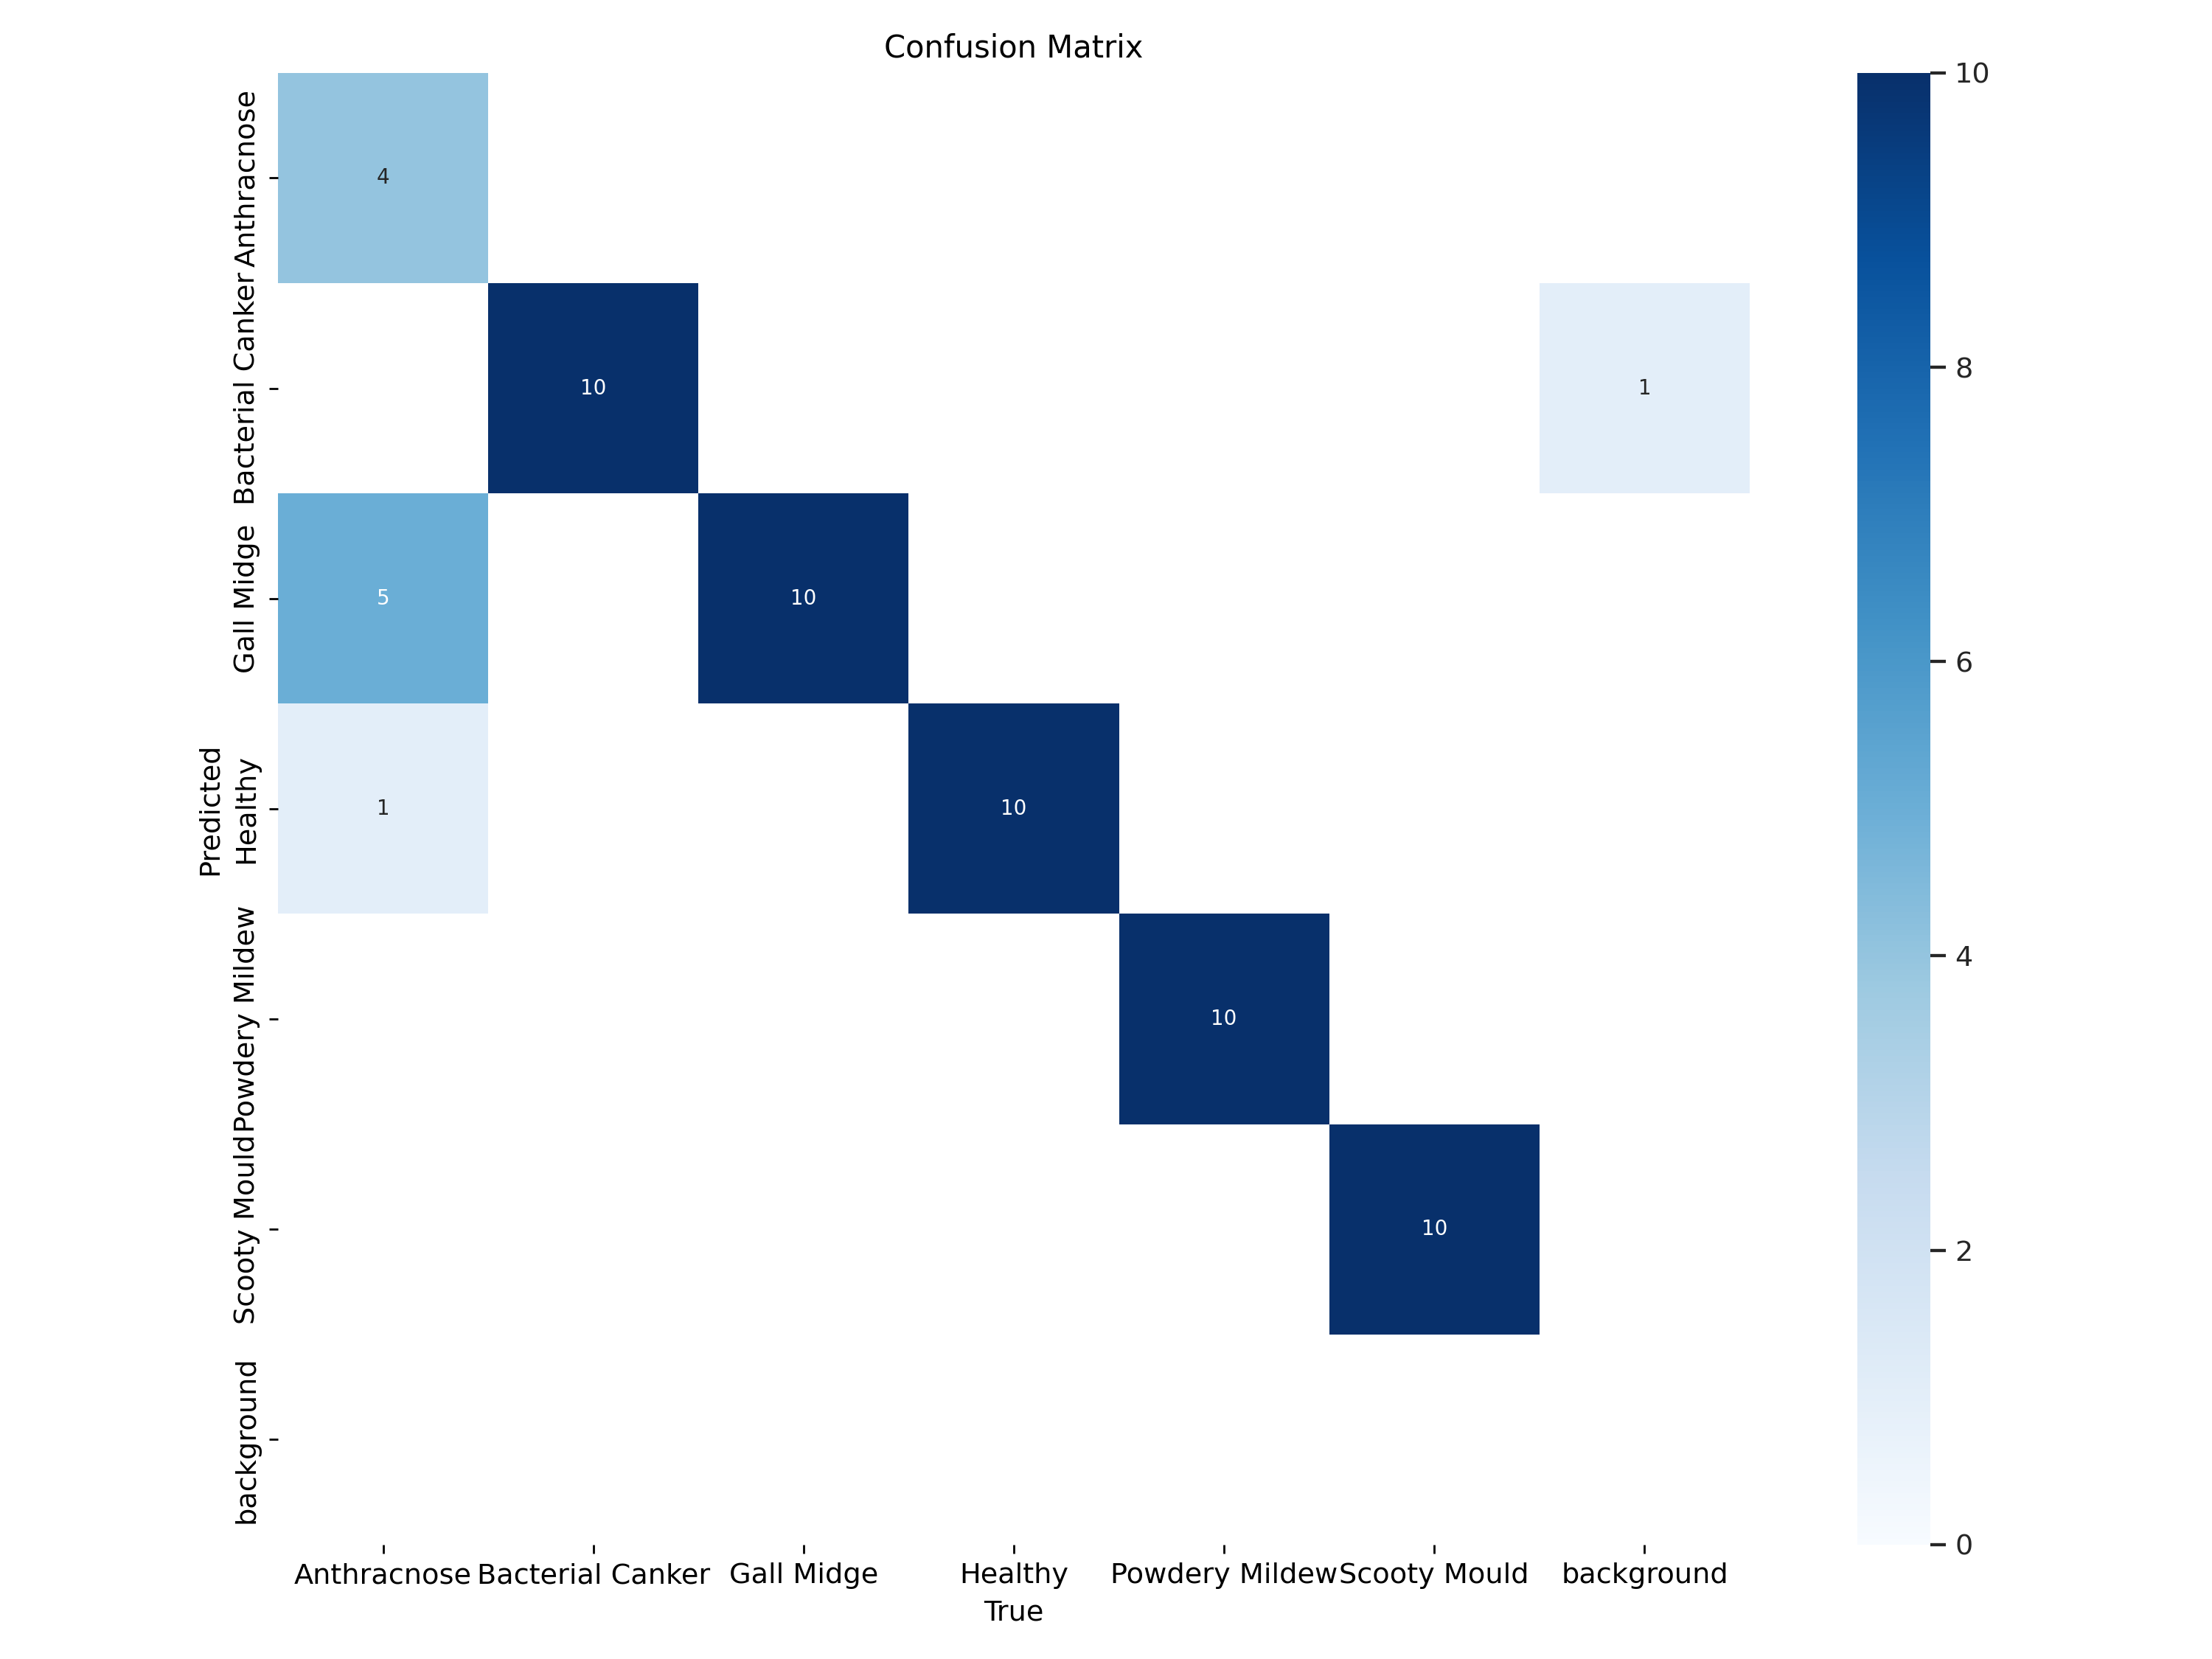

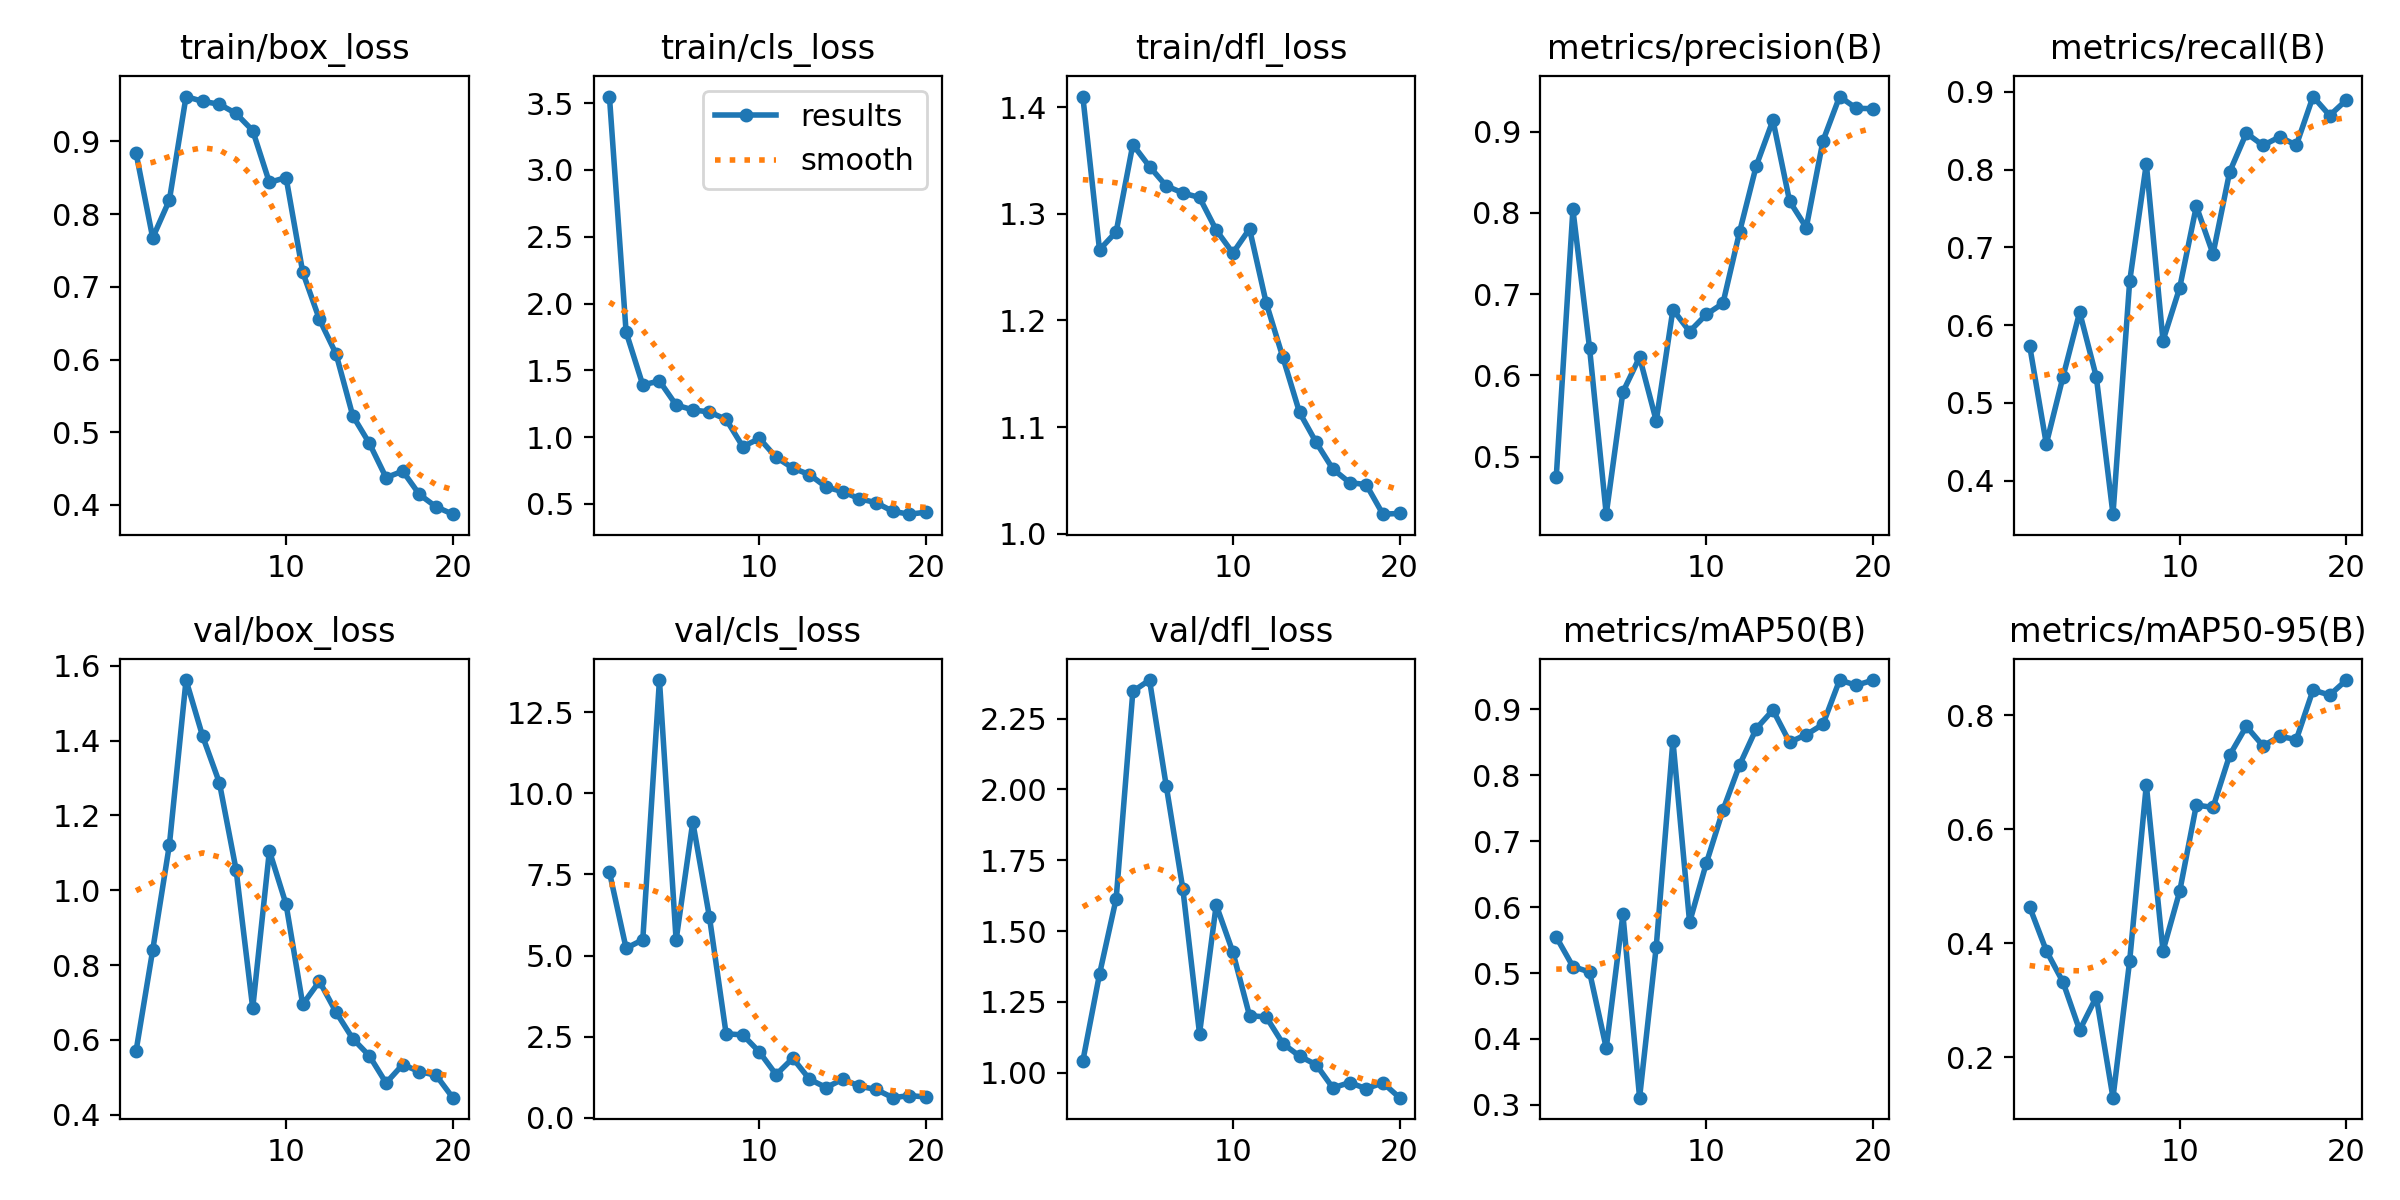

In [22]:
for image_path in glob.glob(f'/content/drive/MyDrive/yolov8m/output/runs/detect/train/*.png'):
      display(Image(filename=image_path, width=600,height=600))
      print("\n")

In [ ]:
run_path='/content/runs'
os.system(f'rmdir /S {run_path}')

256